In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyextremes import EVA, get_extremes, get_return_periods

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 1000

In [2]:
df = pd.read_csv('../data/interpolated_kupang.csv', 
                 index_col='time', parse_dates=True)

In [3]:
ts = df['discharge']

In [4]:
block_size = "365.2425D"
model = EVA(data=ts)
model.get_extremes(method="BM", extremes_type="high",
                   block_size=block_size, errors="ignore")

model.fit_model(model='Emcee')
print(model)

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                     discharge      Size:                                 411
Start:                        August 1975      End:                         October 2009
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 35      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

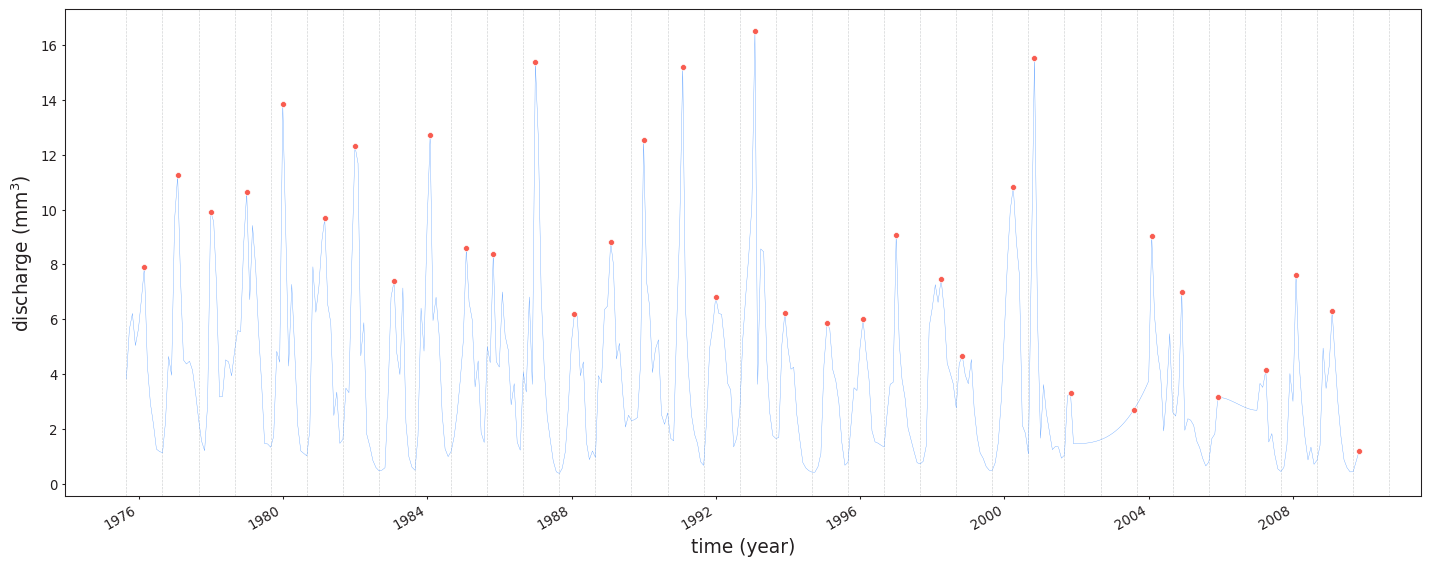

In [5]:
fig, ax = model.plot_extremes(figsize=(15,6))
ax.set_xlabel('time (year)', fontsize=14);
ax.set_ylabel('discharge (mm$^3$)', fontsize=14);
fig.tight_layout();
fig.savefig('../figs/fig6.png')

/tmp/ipykernel_20478/2385111410.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout();
/tmp/ipykernel_20478/2385111410.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout();


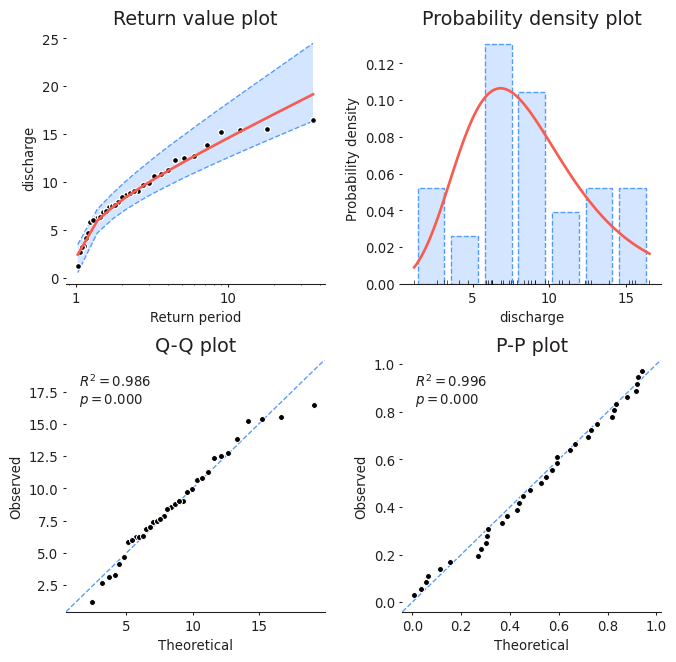

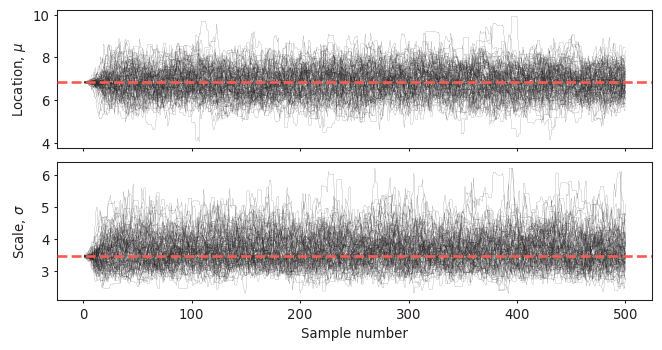

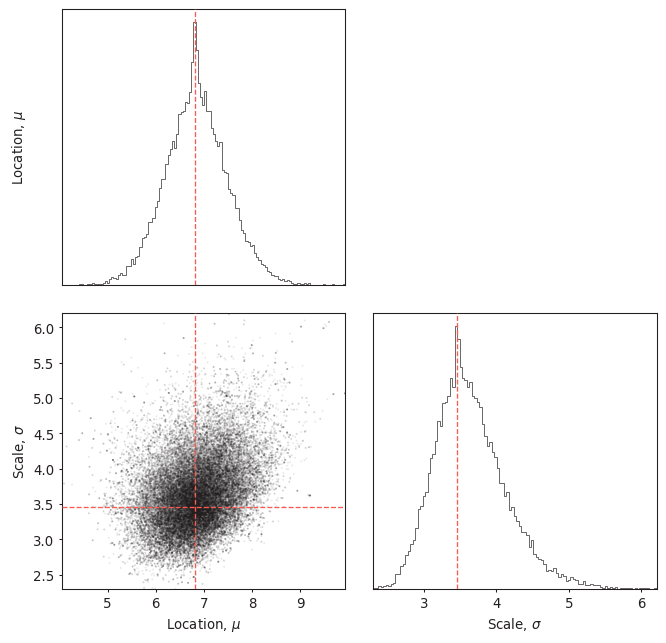

In [15]:
fig,ax = model.plot_diagnostic(alpha=0.95)
sns.despine(left=True)

fig, ax = model.plot_trace()
fig.tight_layout();

fig, ax = model.plot_corner();
fig.tight_layout();

/tmp/ipykernel_20478/3491223947.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout();


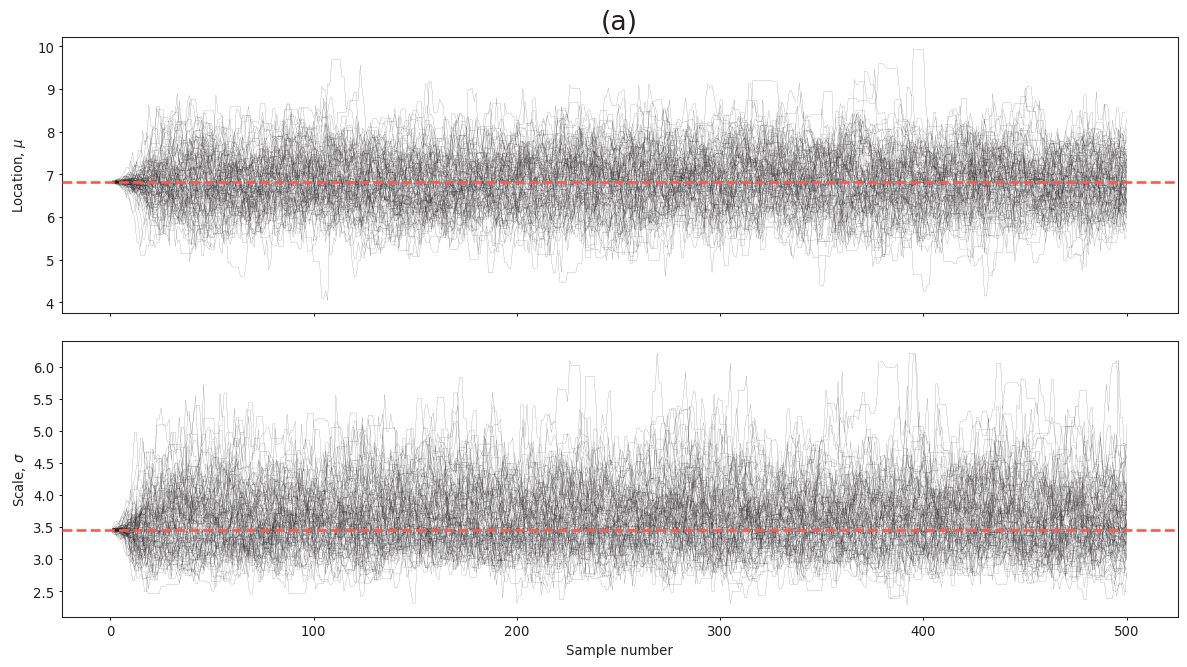

/tmp/ipykernel_20478/107521401.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout();


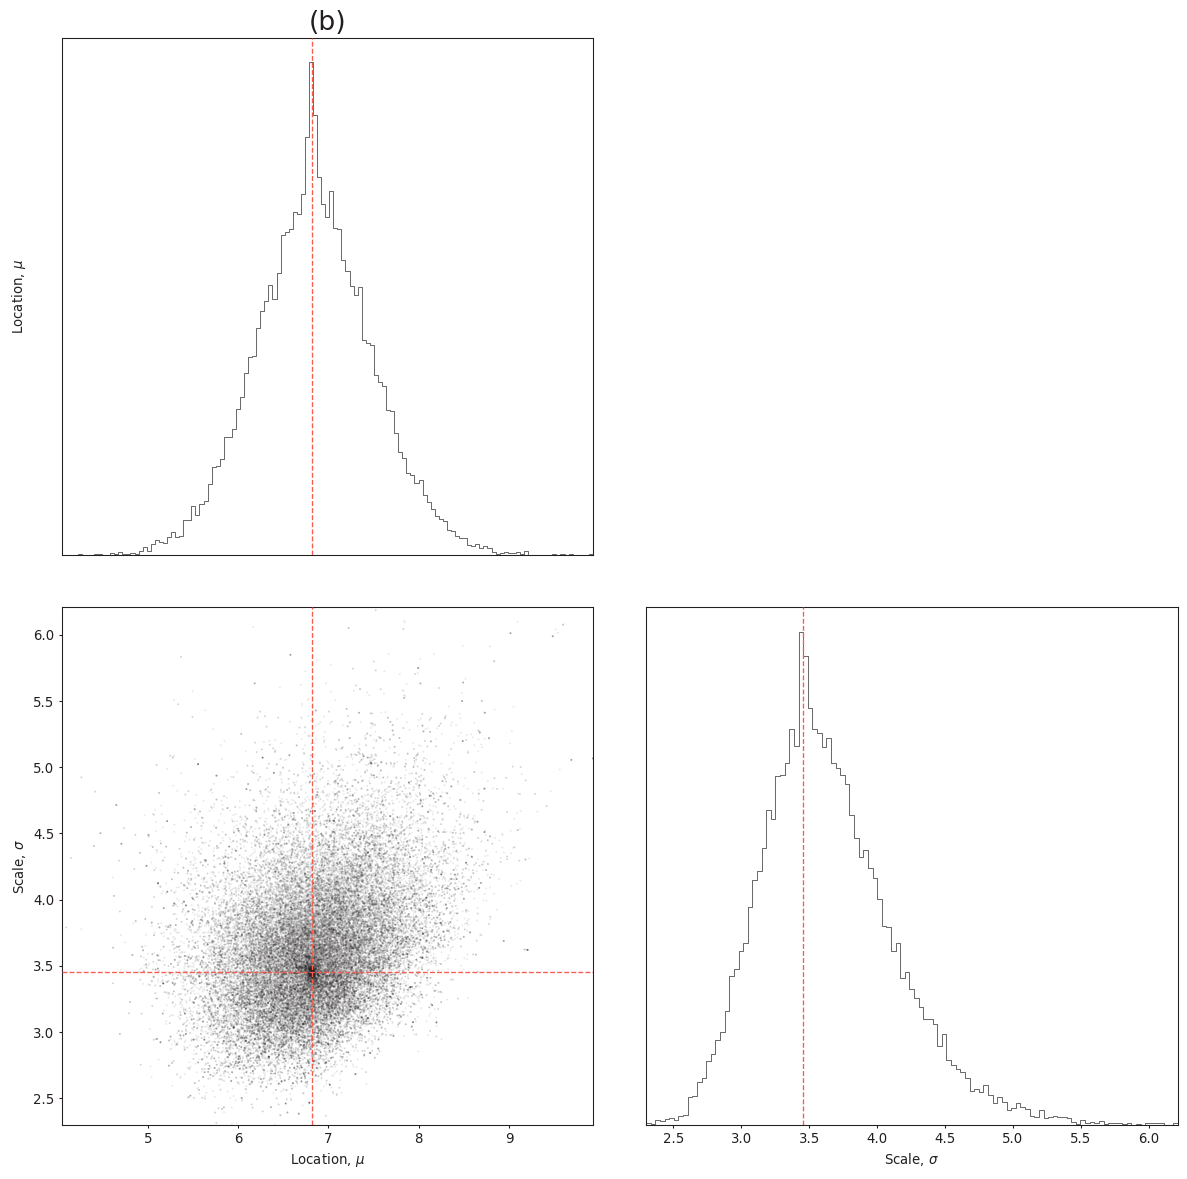

In [9]:
summary_bm = model.get_summary(return_period=[2, 5, 10, 25, 50, 100], alpha=0.95)
summary_bm.to_csv('../data/bm_rp_sum.csv')

In [10]:
extremes = get_extremes(
    ts=ts,
    method="BM",
    block_size="365.2425D",
)
return_periods = get_return_periods(ts=ts, extremes=extremes, extremes_method="BM", 
                                    extremes_type="high", block_size="365.2425D",
                                    return_period_size="365.2425D",plotting_position="weibull")

rp =return_periods.sort_values("return period", ascending=False)
rp.to_csv('../data/high_return_periods.csv')

In [11]:
return_periods

,discharge,exceedance probability,return period
time,,,
1976-02-29,7.893000,0.527778,1.894737
1977-01-31,11.255000,0.250000,4.000000
1977-12-31,9.926000,0.333333,3.000000
1978-12-31,10.645000,0.305556,3.272727
1979-12-31,13.842000,0.138889,7.200000
1981-02-28,9.682000,0.361111,2.769231
1981-12-31,12.320000,0.222222,4.500000
1983-01-31,7.391000,0.611111,1.636364
1984-01-31,12.718000,0.166667,6.000000


In [12]:
print("Kurtosis: ", df.kurtosis())
print("Skewness: ", df.skew())

Kurtosis:  discharge    2.358638
dtype: float64
Skewness:  discharge    1.384968
dtype: float64
